In [ ]:
# !unzip data.csv

In [1]:
print(555)

555


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
tehran_data = pd.read_csv('CSV_data/data.csv')
tehran_data.sample(5)

,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
64012,64012,200.0,11.8,2.0,100,17,2,0,1,0,1.659423e+09,پاسداران,593.0,3
14644,14644,700.0,0.0,5.0,95,8,2,1,1,1,1.658570e+09,تهرانپارس غربی,700.0,8
149921,149921,300.0,11.0,3.0,132,2,2,1,1,0,1.660895e+09,مجیدیه,666.0,4
43919,43919,430.0,0.0,1.0,54,7,1,1,1,1,1.658991e+09,کوی فردوس,430.0,5
59928,59928,100.0,3.7,2.0,56,20,1,0,0,0,1.659334e+09,صفا,223.0,13


##Definition of each column



1.   deposit: amount of money the customer should pay before get the house
2.   rent: amount of money the customer should pay every month after get the house
3.   floor: number of the floors of the building the house is in
4.   area: the area of the house in square meters
5.   age: the number of years have passed since the house was built
6.   rooms: the number of rooms in the house
7.   elavator: if the house has elevator (1) or not (0)
8.   parking: if the house has ranking (1) or not (0)
9.   Warehouse: if the house has Warehouse (1) or not (0)
10.  region: the name of the neighborhood that the house located in
11.  all_to_deposit: amount of money the customer should pay to get the house if she/he doesn't want to pay rent
12.  district: the district that the house located in

In [4]:
tehran_data.drop(['Unnamed: 0', 'time'], axis=1, inplace=True)
tehran_data.rename(columns = {'elavator':'elevator', 'Warehouse':'warehouse'}, inplace = True)
tehran_data.head()

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
0,320.0,0.0,1.0,55,7,1,1,1,0,استاد معین,320.0,9
1,300.0,0.1,3.0,45,13,1,0,1,1,آذربایجان,303.0,10
2,300.0,30.0,2.0,128,9,3,1,1,1,محمودیه,1300.0,1
3,600.0,18.0,8.0,132,16,2,1,1,1,فرمانیه,1200.0,1
4,200.0,11.0,2.0,105,7,2,1,1,1,شهران شمالی,566.0,5


In [5]:
print(f'minimum of rent: {min(tehran_data.rent)}')
print(f'minimum of deposit: {min(tehran_data.deposit)}')
print(f'minimum of all_to_deposit: {min(tehran_data.all_to_deposit)}')

minimum of rent: 0.0
minimum of deposit: 0.0
minimum of all_to_deposit: 1.0


In [6]:
# let's look at these houses with rent=0
tehran_data[tehran_data.rent==0]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
0,320.0,0.0,1.0,55,7,1,1,1,0,استاد معین,320.0,9
5,900.0,0.0,2.0,120,1,2,1,1,1,تهرانپارس شرقی,900.0,4
10,3500.0,0.0,3.0,240,1,3,1,1,1,پاسداران,3500.0,3
16,420.0,0.0,3.0,73,16,2,0,1,1,تهران‌سر,420.0,21
17,500.0,0.0,2.0,70,11,1,1,1,1,کوی فردوس,500.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
165108,530.0,0.0,4.0,60,5,1,1,1,1,جنت‌آباد مرکزی,530.0,5
165110,1700.0,0.0,3.0,140,4,3,1,1,1,نیاوران,1700.0,1
165112,550.0,0.0,5.0,80,8,2,1,1,1,چیتگر,550.0,21
165114,2300.0,0.0,3.0,160,10,3,1,1,1,اقدسیه,2300.0,1


It doesn't seem so wierd bacause the cost of these houses have been paid all in deposit

In [7]:
# let's look at these houses with deposit=0
tehran_data[tehran_data.deposit==0]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
1175,0.0,30.0,2.0,110,16,2,1,1,1,سعادت‌آباد,1000.0,2
2656,0.0,150.0,4.0,231,0,3,1,1,1,باغ فردوس,5000.0,1
5127,0.0,80.0,1.0,280,7,3,0,1,1,جردن,2666.0,3
6102,0.0,70.0,5.0,300,8,3,1,1,1,جردن,2333.0,3
8133,0.0,13.0,1.0,50,2,1,0,1,1,سهروردی,433.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...
162197,0.0,52.0,2.0,150,5,3,1,1,1,ونک,1733.0,3
164116,0.0,40.0,2.0,128,3,3,1,1,1,جردن,1333.0,3
164356,0.0,0.6,0.0,12,7,0,0,1,0,فلاح,20.0,14
164751,0.0,3600.0,6.0,275,0,3,1,1,1,زعفرانیه,120000.0,1


It doesn't seem so wierd too bacause the cost of these houses have been paid all in rent

In [8]:
# let's look at these houses with all_to_deposit=1
tehran_data[tehran_data.all_to_deposit==1]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
3527,1.0,0.0,1.0,118,6,2,1,1,1,جنت‌آباد مرکزی,1.0,5
15499,1.0,0.0,4.0,117,13,2,1,1,1,قیطریه,1.0,1
17411,1.0,0.0,3.0,128,9,3,1,1,1,باغ فیض,1.0,5
21317,1.0,0.0,3.0,43,12,1,1,1,1,فلاح,1.0,14
29305,1.0,0.0,3.0,123,5,3,1,1,1,یوسف‌آباد,1.0,6
76173,1.0,0.0,3.0,125,11,2,1,1,1,دروس,1.0,3
76486,1.0,0.0,4.0,75,11,2,0,0,1,تهرانپارس شرقی,1.0,4
78511,1.0,0.0,6.0,152,3,3,1,1,1,جنت‌آباد جنوبی,1.0,5
97933,1.0,0.0,3.0,170,11,3,1,1,1,پاسداران,1.0,3
101186,1.0,0.0,4.0,135,6,2,1,1,1,سعادت‌آباد,1.0,2


The houses with rent=0 and deposit=1 in this table is a little wierd (also consider the area of the houses and their district which are not a bad district in Tehran at all)

In [9]:
tehran_data = tehran_data[tehran_data.all_to_deposit != 1]

In [10]:
tehran_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 165097 entries, 0 to 165117
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   deposit         165097 non-null  float64
 1   rent            165097 non-null  float64
 2   floor           165097 non-null  float64
 3   area            165097 non-null  int64  
 4   age             165097 non-null  int64  
 5   rooms           165097 non-null  int64  
 6   elevator        165097 non-null  int64  
 7   parking         165097 non-null  int64  
 8   warehouse       165097 non-null  int64  
 9   region          165097 non-null  object 
 10  all_to_deposit  165097 non-null  float64
 11  district        165097 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 16.4+ MB


In [11]:
print(f'maximum of rent: {max(tehran_data.rent)}')
print(f'maximum of deposit: {max(tehran_data.deposit)}')
print(f'maximum of all_to_deposit: {max(tehran_data.all_to_deposit)}')

maximum of rent: 50000.0
maximum of deposit: 50000.0
maximum of all_to_deposit: 1668166.0


In [12]:
# let's look at these houses with rent=50000
tehran_data[tehran_data.rent==50000]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
40075,1400.0,50000.0,6.0,300,2,4,1,1,1,پاسداران,1668066.0,3
41394,1400.0,50000.0,6.0,300,2,4,1,1,1,پاسداران,1668066.0,3
75609,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
78136,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
83783,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
83794,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
83805,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
83821,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
86393,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2
88861,1000.0,50000.0,3.0,190,8,3,1,1,1,سعادت‌آباد,1667666.0,2


It's normal

In [13]:
# let's look at these houses with deposit=50000
tehran_data[tehran_data.deposit==50000]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
149089,50000.0,0.55,1.0,40,18,1,0,0,0,منیریه,50018.0,11
165059,50000.0,9.50,3.0,65,16,2,0,1,1,شادمهر,50316.0,2


These two houses doesn't seem normal because they are approximately small and too old (consider that they don't have elavator and the first one even doesn't have parking)

In [14]:
# to be sure that the second house is wierd, let's see other houses in its region
tehran_data[tehran_data.region=='شادمهر']

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
419,200.0,5.0,2.0,65,16,1,0,0,1,شادمهر,366.0,2
1381,400.0,9.0,1.0,110,2,2,1,1,1,شادمهر,700.0,2
1543,300.0,10.0,1.0,98,7,2,1,1,1,شادمهر,633.0,2
1676,300.0,7.0,3.0,69,8,2,1,1,1,شادمهر,533.0,2
2364,870.0,0.0,4.0,118,2,2,1,1,1,شادمهر,870.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
163671,220.0,6.0,2.0,72,11,2,0,0,1,شادمهر,420.0,2
163736,850.0,0.0,1.0,90,5,2,1,1,1,شادمهر,850.0,2
164050,500.0,7.0,3.0,100,1,2,1,1,1,شادمهر,733.0,2
164587,330.0,6.5,2.0,78,11,2,0,1,1,شادمهر,546.0,2


In [15]:
tehran_data = tehran_data[tehran_data.deposit != 50000]

In [16]:
# let's look at these houses with all_to_deposit=1668166
tehran_data[tehran_data.all_to_deposit==1668166]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
154664,1500.0,50000.0,3.0,185,2,3,1,1,1,سعادت‌آباد,1668166.0,2


It's normal too

In [17]:
print(f'minimum of area: {min(tehran_data.area)}')
print(f'maximum of area: {max(tehran_data.area)}')

minimum of area: 1
maximum of area: 582500


In [18]:
tehran_data = tehran_data[(tehran_data.area>=30) & (tehran_data.area<582500)]

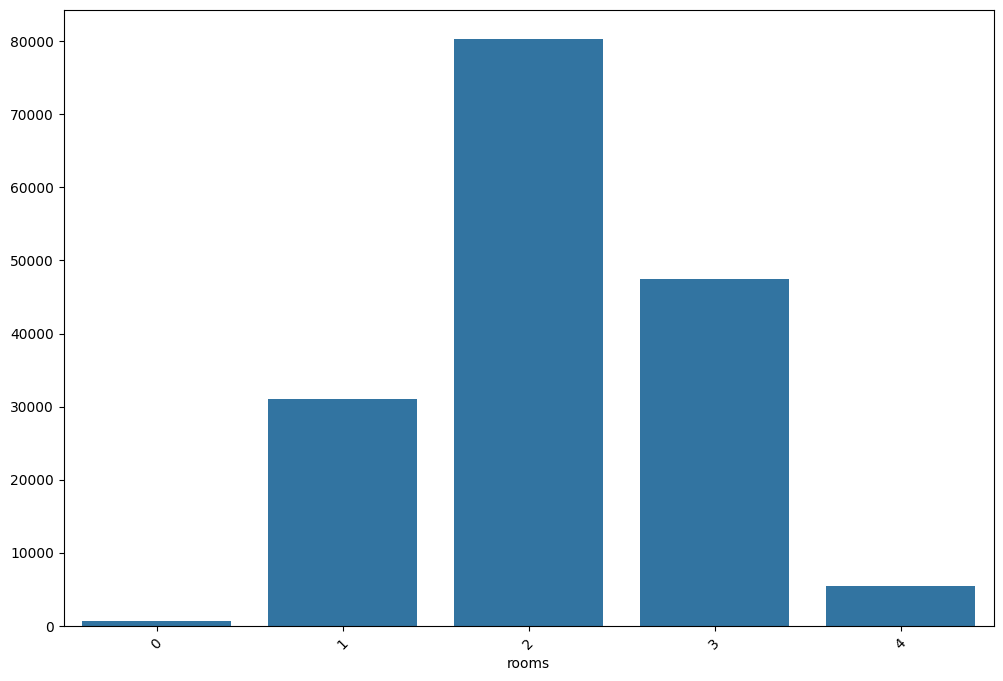

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=tehran_data.rooms.value_counts().index,y=tehran_data.rooms.value_counts().values)
plt.xticks(rotation=45)
plt.show()

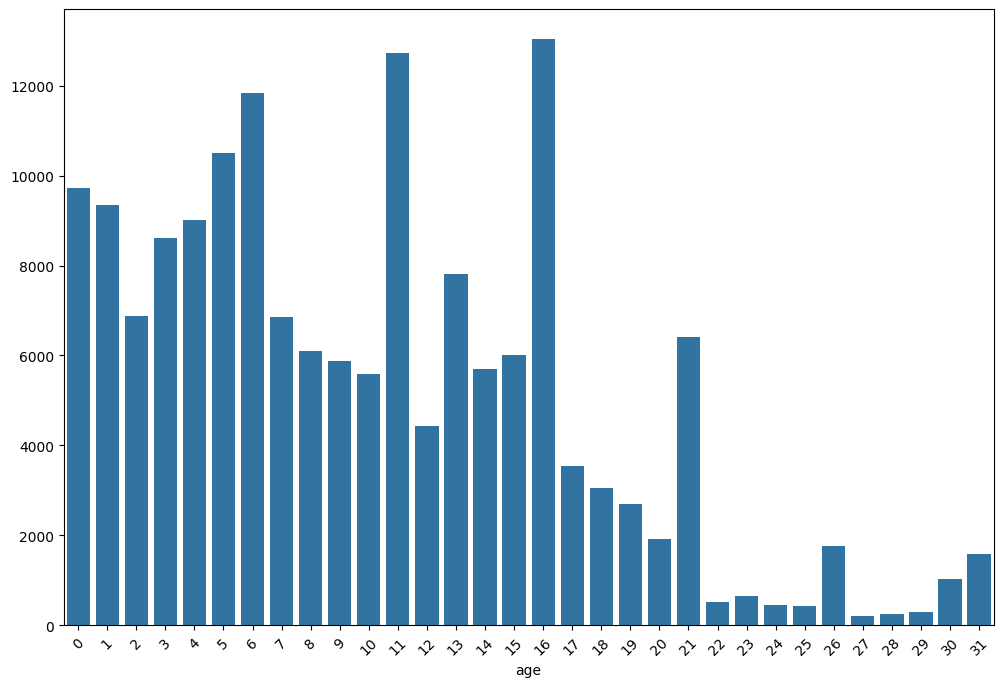

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x=tehran_data.age.value_counts().index,y=tehran_data.age.value_counts().values)
plt.xticks(rotation=45)
plt.show()

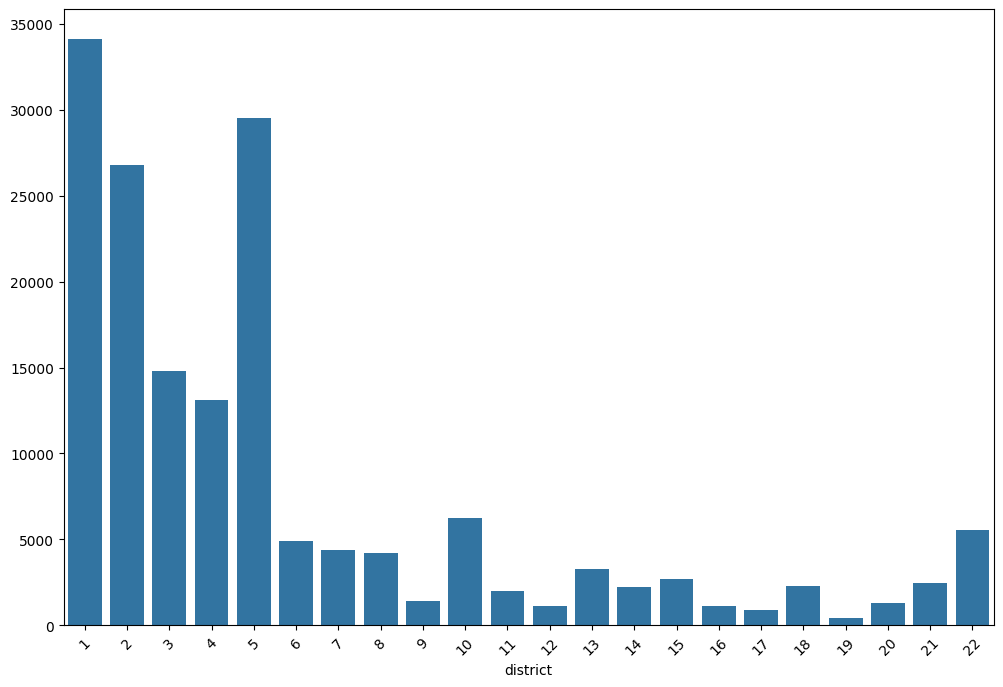

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=tehran_data.district.value_counts().index,y=tehran_data.district.value_counts().values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=tehran_data.floor.value_counts().index,y=tehran_data.floor.value_counts().values)
plt.xticks(rotation=45)
plt.show()

In [ ]:
sns.histplot(data=tehran_data,x='elevator')
plt.show()

In [ ]:
sns.histplot(data=tehran_data,x='parking')
plt.show()

In [ ]:
sns.histplot(data=tehran_data,x='warehouse')
plt.show()

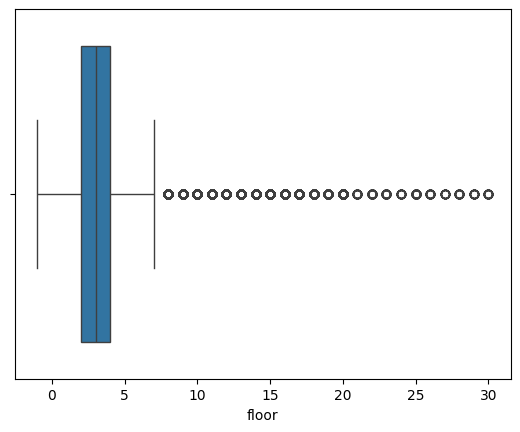

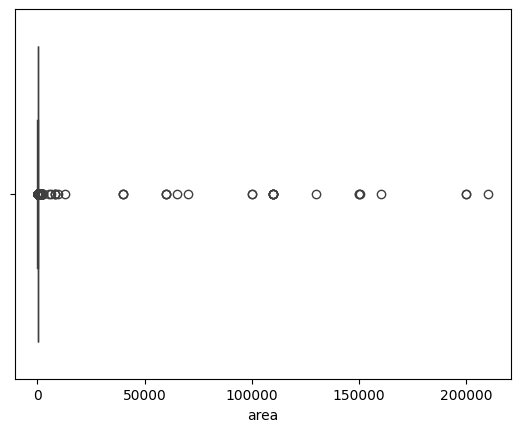

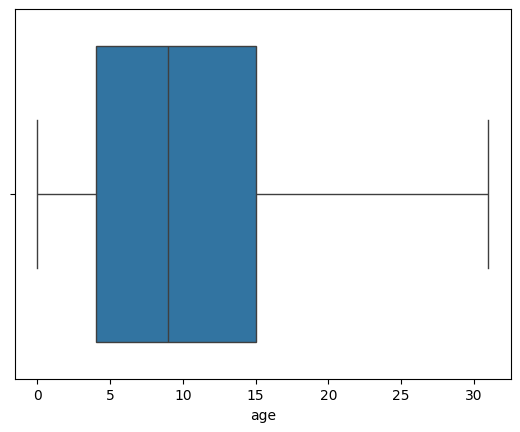

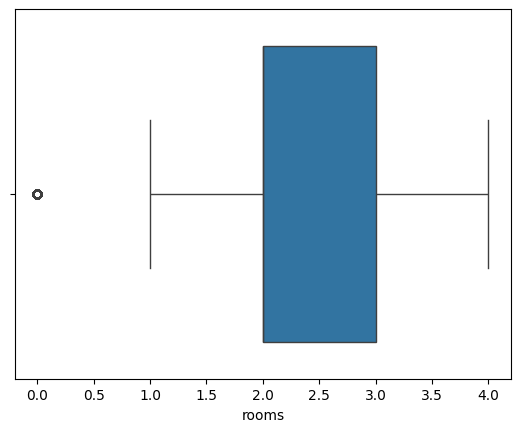

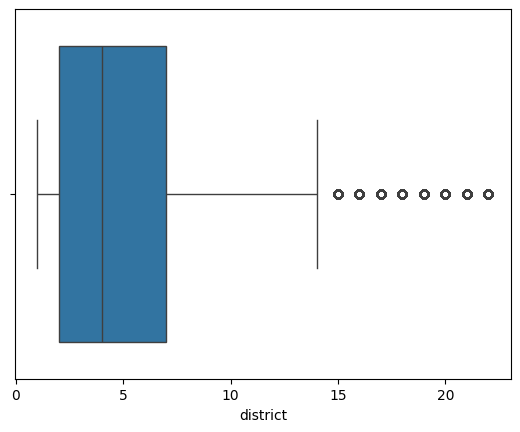

In [22]:
for col in ['floor','area','age','rooms','district']:
  sns.boxplot(x=tehran_data[col])
  plt.show()

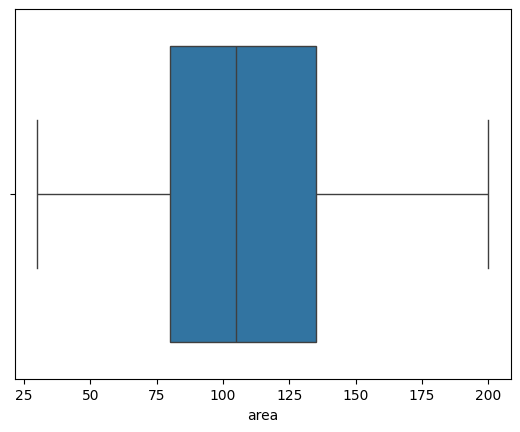

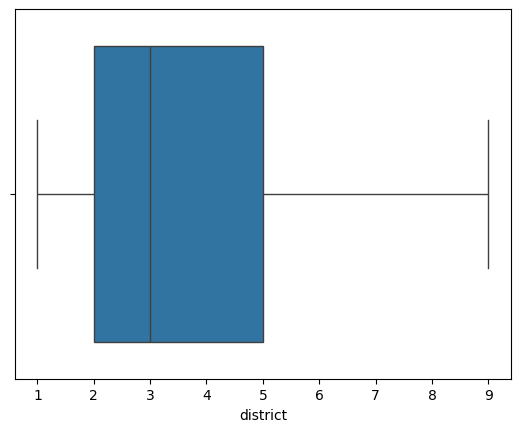

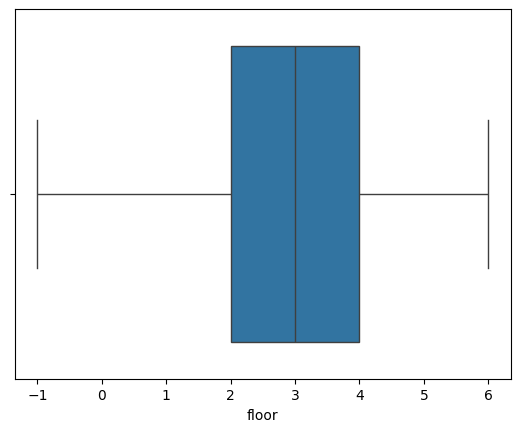

In [23]:
tehran_data = tehran_data[tehran_data.area<=200]
tehran_data = tehran_data[tehran_data.district<10]
tehran_data = tehran_data[tehran_data.floor<=6]
for col in ['area','district','floor']:
  sns.boxplot(x=tehran_data[col])
  plt.show()

In [24]:
def bar_chart(data,feature,stacked=True):
    evelator = tehran_data[tehran_data.elevator == 1][feature].value_counts()
    no_evelator = tehran_data[tehran_data.elevator==0][feature].value_counts()
    data_ev_no = pd.DataFrame([evelator , no_evelator])
    data_ev_no.index = ['evelator' , 'no-evelator']
    data_ev_no.plot(kind="bar",stacked=stacked,figsize=(8,10))

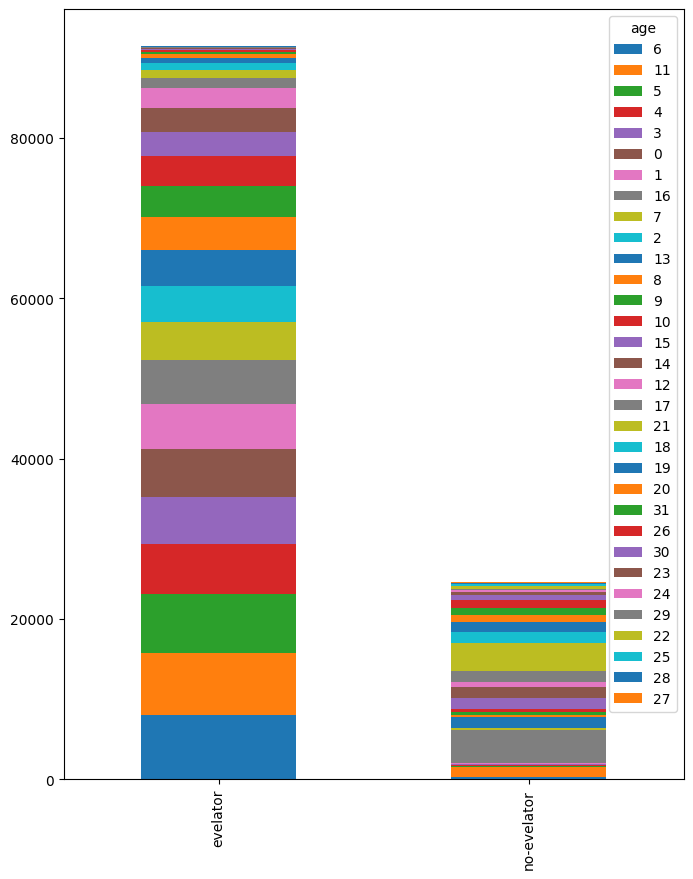

In [25]:
bar_chart(tehran_data,'age')

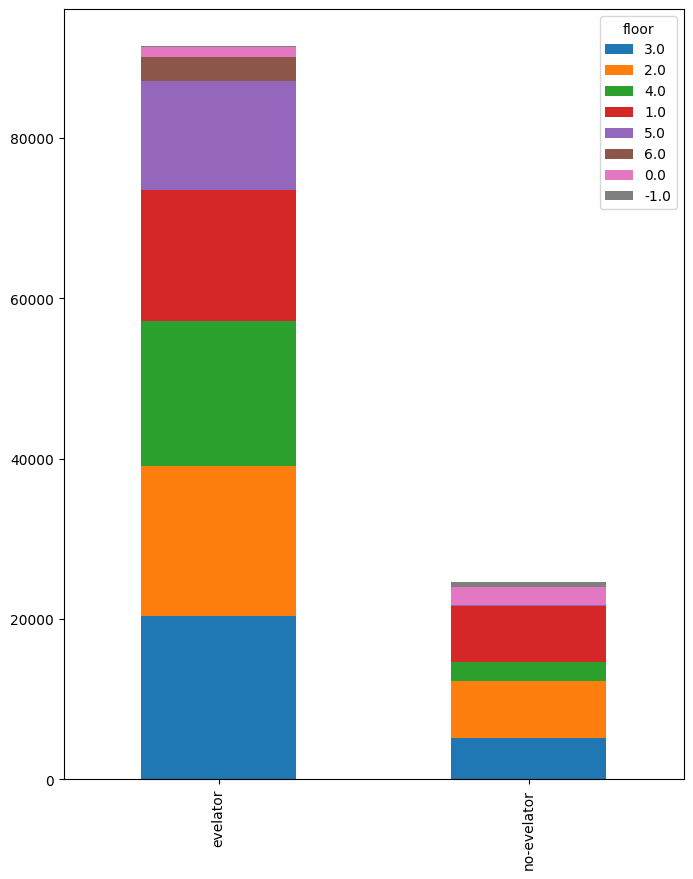

In [26]:
bar_chart(tehran_data,'floor')

In [27]:
# there is no considrebly relation between floor -1 and 0
tehran_data.loc[tehran_data['floor'] == -1, 'floor'] = 0

In [30]:
plt.figure(figsize=(12,8))
corr = tehran_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

ValueError: could not convert string to float: 'استاد معین'

<Figure size 1200x800 with 0 Axes>

## What information can we take from this HeatMap?
1. rent & all_to_deposit are highly correlated.
2. with incrasing the district, deposit decreases
3. all_to_deposit (and rent also) has approximately no relation with the number of floors and rooms, area, age, having elavator, parking and warehouse and also the district of the house, while deposit has a meaningful relation with them.
4. age has an inverse relationship with having evelator and parking
5. rooms, evelator, parking and warehouse are approximately correlated.

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_6332\2769155464.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tehran_data['deposit'])


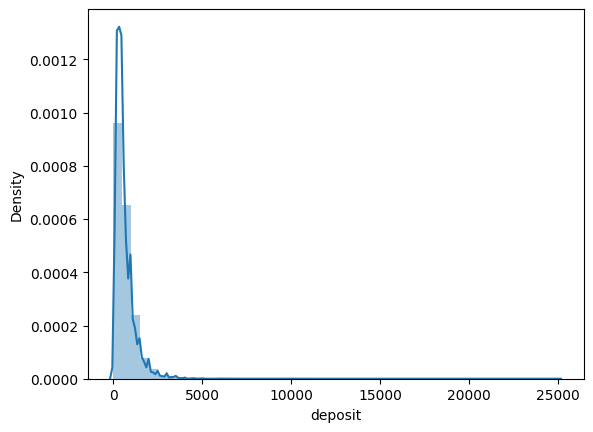

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_6332\2769155464.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tehran_data['rent'].apply(np.log1p))


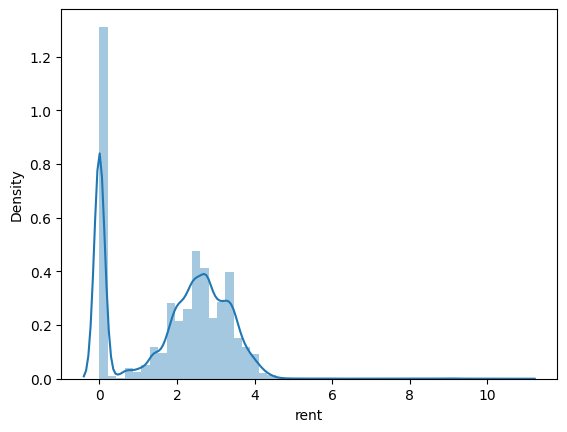

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_6332\2769155464.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tehran_data['all_to_deposit'].apply(np.log1p))


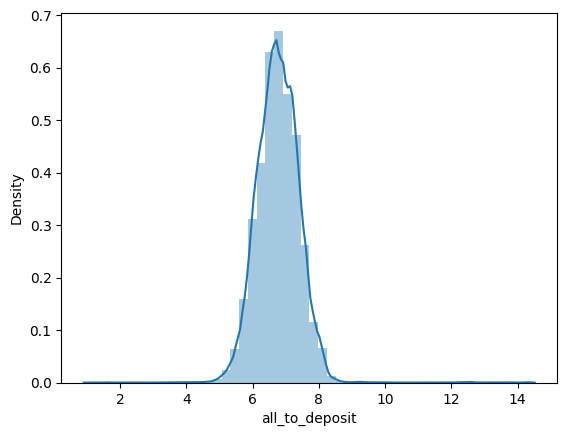

In [31]:
sns.distplot(tehran_data['deposit'])
plt.show()
sns.distplot(tehran_data['rent'].apply(np.log1p))
plt.show()
sns.distplot(tehran_data['all_to_deposit'].apply(np.log1p))
plt.show()

In [32]:
tehran_data[tehran_data.rooms==0]

,deposit,rent,floor,area,age,rooms,elevator,parking,warehouse,region,all_to_deposit,district
620,50.0,4.0,0.0,30,20,0,0,0,0,پونک,183.0,5
801,70.0,8.0,3.0,40,21,0,0,0,0,نیاوران,336.0,1
1147,150.0,20.0,0.0,135,30,0,0,0,0,زعفرانیه,816.0,1
1317,100.0,5.0,1.0,65,21,0,0,0,1,کاشانک,266.0,1
3377,450.0,0.0,5.0,43,31,0,1,1,0,اکباتان,450.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
163931,100.0,10.0,2.0,40,5,0,1,0,1,قیطریه,433.0,1
164166,30.0,3.1,2.0,35,21,0,0,0,1,شمیران‌نو,133.0,4
164239,30.0,2.2,0.0,35,21,0,0,0,0,تهرانپارس شرقی,103.0,4
164572,300.0,2.0,0.0,60,26,0,0,0,1,یوسف‌آباد,366.0,6


That's ok, no need to remove rooms=0 data

##Prediction

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
# let's first drop the region column and train the model and then add this column (one hot or get_dummies) and compare the result

tehran_data = pd.get_dummies(tehran_data, drop_first=True)
X = tehran_data.drop(['rent','deposit', 'all_to_deposit'], axis=1)
y = tehran_data['all_to_deposit']

In [37]:
score = {}
for i in tqdm([3, 5, 7]):
    knn = KNeighborsRegressor(i)
    knn.fit(X,y)
    y_pred = knn.predict(X)
    print(f'n_estimators={i}')
    print(f'r2 score is:{r2_score(y, y_pred)}')
    print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')

  0%|          | 0/3 [00:00<?, ?it/s]

n_estimators=3
r2 score is:0.5627522718528576
RMSE is:17019.29149630005
n_estimators=5
r2 score is:0.5381207707465532
RMSE is:17492.098412751588
n_estimators=7
r2 score is:0.527874107586656
RMSE is:17685.062754808358


In [ ]:
# knn = KNeighborsRegressor()
# knn.fit(X,y)
# y_pred = knn.predict(X)
# print(f'r2 score is:{r2_score(y, y_pred)}')
# print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')
# plt.scatter(y,y_pred)

In [ ]:
score = {}
for i in tqdm([50, 100, 150, 200]):
    rf = RandomForestRegressor(n_estimators=i)
    rf.fit(X,y)
    y_pred = rf.predict(X)
    print(f'n_estimators={i}')
    print(f'r2 score is:{r2_score(y, y_pred)}')
    print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')

In [ ]:
# rf = RandomForestRegressor(n_estimators=150)
# rf.fit(X,y)
# y_pred = rf.predict(X)
# print(f'r2 score is:{r2_score(y, y_pred)}')
# print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')
# plt.scatter(y,y_pred)

In [ ]:
score = {}
for i in tqdm([50, 100, 150, 200]):
    xg = XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=i, objective='reg:squarederror')
    xg.fit(X,y)
    y_pred = xg.predict(X)
    print(f'n_estimators={i}')
    print(f'r2 score is:{r2_score(y, y_pred)}')
    print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')

In [ ]:
score = {}
for i in tqdm([3,5,7]):
    xg = XGBRegressor(max_depth=i, learning_rate=0.1, n_estimators=150, objective='reg:squarederror')
    xg.fit(X,y)
    y_pred = xg.predict(X)
    print(f'n_estimators={i}')
    print(f'r2 score is:{r2_score(y, y_pred)}')
    print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')

In [ ]:
score = {}
for i in tqdm([0.01,0.1,1]):
    xg = XGBRegressor(max_depth=5, learning_rate=i, n_estimators=150, objective='reg:squarederror')
    xg.fit(X,y)
    y_pred = xg.predict(X)
    print(f'n_estimators={i}')
    print(f'r2 score is:{r2_score(y, y_pred)}')
    print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')

In [ ]:
xg = XGBRegressor(max_depth=7, learning_rate=1, n_estimators=200, objective='reg:squarederror')
xg.fit(X,y)
y_pred = xg.predict(X)
print(f'r2 score is:{r2_score(y, y_pred)}')
print(f'RMSE is:{np.sqrt(mean_squared_error(y, y_pred))}')
plt.scatter(y,y_pred)